# Counterfeit detection

The task in this assignment is to detect the  counterfeit banknotes. The data set is based on [banknote authentication Data Set ](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#) from UCI Machine Learning repository. The first three columns denote different parameters obtained from the photographs of the banknotes and last colum provides the label. Frankly as the dataset does not have any description I don't know  which labels corresponds to real and which to counterfeited banknotes. let's assume that label one (positive) denotes the clounterfeits. The set  [banknote_authentication.csv](./data/banknote_authentication.csv) can be found in the `data`  directory.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [3]:
import  matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,8)

Please insert you  firstname  and name below

In [4]:
from  sklearn.model_selection import train_test_split
seed = 31287

In [5]:
data = pd.read_csv('data/banknotes_data.csv')

In [6]:
data.head()

,a0,a1,a2,a3,counterfeit
0,-1.1306,1.8458,-1.35750,-1.38060,1
1,-1.1188,3.3357,-1.34550,-1.95730,1
2,2.6719,3.0646,0.37158,0.58619,0
3,-4.1409,3.4619,-0.47841,-3.88790,1
4,1.4507,8.7903,-2.23240,-0.65259,0


In [7]:
data.describe()

,a0,a1,a2,a3,counterfeit
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,0.431116,1.902054,1.426607,-1.220393,0.444254
std,2.845672,5.942260,4.397341,2.101777,0.497096
min,-7.042100,-13.773100,-5.286100,-7.871900,0.000000
25%,-1.770900,-1.916200,-1.664300,-2.466150,0.000000
50%,0.471345,2.408650,0.567365,-0.614450,0.000000
75%,2.816925,6.800675,3.338825,0.394810,1.000000
max,6.824800,12.730200,17.927400,2.449500,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a0           1166 non-null   float64
 1   a1           1166 non-null   float64
 2   a2           1166 non-null   float64
 3   a3           1166 non-null   float64
 4   counterfeit  1166 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 45.7 KB


In [9]:
data_train, data_test = train_test_split(data, test_size=0.2, shuffle=True, stratify=data.loc[:,'counterfeit'], random_state=seed)

In [10]:
data_train

,a0,a1,a2,a3,counterfeit
711,1.94760,-4.773800,8.52700,-1.866800,0
565,1.42760,8.384700,-2.09950,-1.967700,0
912,-4.28590,8.523400,3.13920,-0.916390,0
64,4.92490,0.689060,0.77344,1.209500,0
871,2.19480,1.378100,1.15820,0.857740,0
...,...,...,...,...,...
47,-2.45610,-4.556600,6.45340,-0.056479,1
1161,1.21380,8.798600,-2.16720,-0.741820,0
174,5.87820,5.940900,-2.85440,-0.608630,0
1119,0.17346,7.869500,0.26876,-3.788300,0


In [11]:
lbls_train = data_train['counterfeit']
lbls_test = data_test['counterfeit']

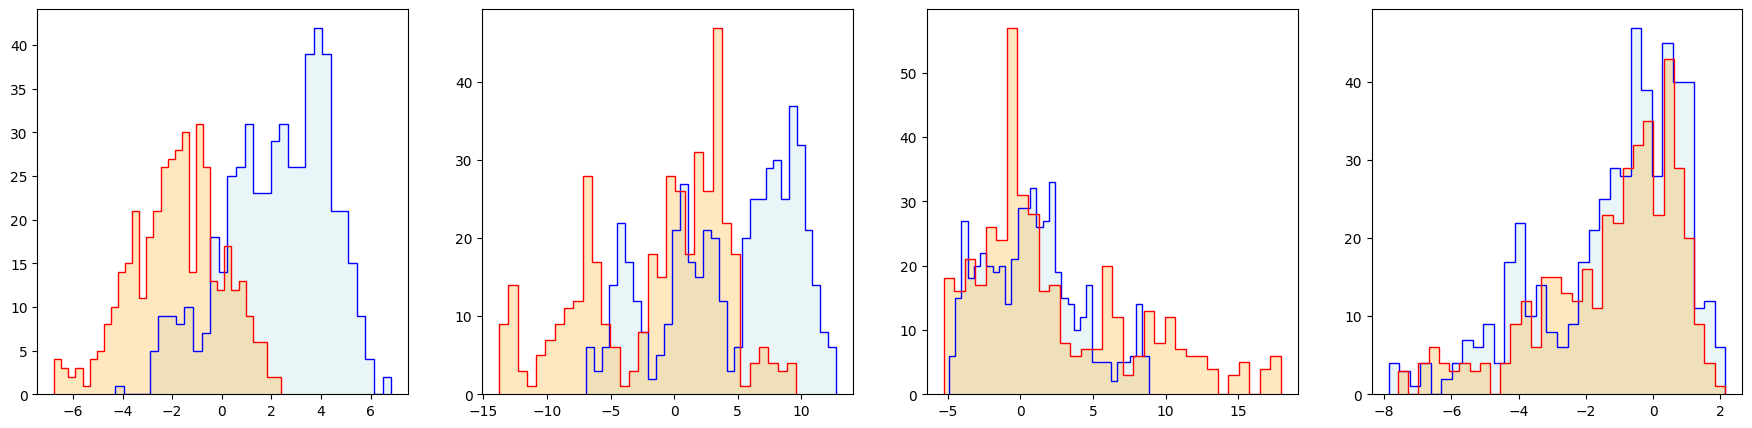

In [12]:
fig, ax = plt.subplots(1,4, figsize=(22,5))
for i in range(4):
    ax[i].hist(data_train[lbls_train==0].iloc[:,i], bins=32, histtype='step', color='blue')
    ax[i].hist(data_train[lbls_train==1].iloc[:,i], bins=32, histtype='step', color='red')
    ax[i].hist(data_train[lbls_train==0].iloc[:,i], bins=32, histtype='bar', color='lightblue', alpha=0.25)
    ax[i].hist(data_train[lbls_train==1].iloc[:,i], bins=32, histtype='bar', color='orange', alpha =0.25)

# Problem 1

Train a neural network classifier to predict counterfeit banknotes. Use the features `a0` and `a3`. Calculate the confussion matrix  and AUC score. 

In [13]:
import torch
import torch.nn as tnn
import torch.optim as optim
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [14]:
features= [0, 3]
nf=len(features)

In [15]:
features_train = torch.from_numpy(data_train.values[:,features]).to(dtype=torch.float32)
labels_train = torch.from_numpy(data_train.values[:,4:5]).to(dtype=torch.float32)

In [16]:
features_test = torch.from_numpy(data_test.values[:,features]).to(dtype=torch.float32)
labels_test = torch.from_numpy(data_test.values[:,4:5]).to(dtype=torch.float32)

In [17]:
model = tnn.Sequential(tnn.Linear(in_features=nf, out_features=1), tnn.Sigmoid())

In [18]:
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score

In [19]:
y_true = labels_test.numpy()
with torch.no_grad():
  y_proba = model(features_test);
  y_predicted = 1*(y_proba>0.5)

In [20]:
criterion = tnn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 2500
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(features_train)
    loss = criterion(outputs, labels_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
with torch.no_grad():
    y_proba = model(features_test).numpy()
    y_predicted = (y_proba > 0.5).astype(int)
    y_true = labels_test.numpy()
    conf_matrix = confusion_matrix(y_true, y_predicted, normalize='true')
    auc_score = roc_auc_score(y_true, y_proba)

print('Confusion Matrix is:\n', conf_matrix)
print(f'AUC Score is: {auc_score:.4f}')

Epoch [100/2500], Loss: 1.1008
Epoch [200/2500], Loss: 0.9363
Epoch [300/2500], Loss: 0.8072
Epoch [400/2500], Loss: 0.7085
Epoch [500/2500], Loss: 0.6333
Epoch [600/2500], Loss: 0.5755
Epoch [700/2500], Loss: 0.5305
Epoch [800/2500], Loss: 0.4950
Epoch [900/2500], Loss: 0.4665
Epoch [1000/2500], Loss: 0.4435
Epoch [1100/2500], Loss: 0.4246
Epoch [1200/2500], Loss: 0.4090
Epoch [1300/2500], Loss: 0.3960
Epoch [1400/2500], Loss: 0.3851
Epoch [1500/2500], Loss: 0.3759
Epoch [1600/2500], Loss: 0.3681
Epoch [1700/2500], Loss: 0.3616
Epoch [1800/2500], Loss: 0.3560
Epoch [1900/2500], Loss: 0.3512
Epoch [2000/2500], Loss: 0.3471
Epoch [2100/2500], Loss: 0.3436
Epoch [2200/2500], Loss: 0.3407
Epoch [2300/2500], Loss: 0.3381
Epoch [2400/2500], Loss: 0.3359
Epoch [2500/2500], Loss: 0.3341
Confusion Matrix is:
 [[0.9        0.1       ]
 [0.16346154 0.83653846]]
AUC Score is: 0.9516


In [21]:
accuracy_score(y_true, y_pred=y_predicted)

0.8717948717948718